In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from state_cleaner import *
import datetime
import csv
from scipy import stats as st
import itertools
import re 

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
os.chdir('../..')
os.chdir('CovidMobile')
os.getcwd()

'C:\\Users\\Noah\\CovidMobile'

In [15]:
def prez_data():
    prez = pd.read_csv("data/countypres_2000-2016.csv")
    prez = prez[prez['year']==2016]
    prez['vote_share'] = prez['candidatevotes'] / prez['totalvotes']
    prez['max'] = prez.groupby(['FIPS','year'])['candidatevotes'].transform(max)
    prez_win = prez[prez['max']==prez['candidatevotes']].copy()
    prez_win = pd.concat([prez_win.reset_index(),prez[prez['party']=='republican']['vote_share'].rename('vote_share_rep').reset_index()],axis=1)
    return prez_win

In [65]:
df = pd.read_csv('data/compiled_2020-05-15.csv')
df.shape

(224170, 118)

In [66]:
df[df['state_abb_x']=='TX'].groupby(['FIPS'])['date'].count().sort_values().to_csv('chk.csv')

In [67]:
['soe', 'sah', 'state_ease', 'state_sah',
'state_mandate', 'state_non_ess', 'state_lgb', 'state_sc',
'state_bar_res', 'state_election', 'state_emergency',
'state_compliance', 'state_prepare']

['soe',
 'sah',
 'state_ease',
 'state_sah',
 'state_mandate',
 'state_non_ess',
 'state_lgb',
 'state_sc',
 'state_bar_res',
 'state_election',
 'state_emergency',
 'state_compliance',
 'state_prepare']

In [68]:
df.columns.values

array(['country_region_code', 'country_region', 'state_x', 'county_x',
       'date', 'retail', 'food_drugs', 'park', 'transit', 'work', 'homes',
       'source', 'state_abb_x', 'FIPS', 'geo', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'Births_2018', 'Deaths_2018', 'NATURAL_INC_2018',
       'INTERNATIONAL_MIG_2018', 'DOMESTIC_MIG_2018', 'NET_MIG_2018',
       'RESIDUAL_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018',
       'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018',
       'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'POVALL_2018',
       'CI90LBAll_2018', 'CI90UBALL_2018', 'PCTPOVALL_2018',
       'CI90LBALLP_2018', 'CI90UBALLP_2018', 'POV017_2018',
       'CI90LB017_2018', 'CI90UB017_2018', 'PCTPOV017_2018',
       'CI90LB017P_2018', 'CI90UB017P_2018', 'POV517_2018',
       'CI90LB517_2018', 'CI90UB517_2018', 'PCTPOV517_2018',
       'CI90LB517P_2018', 'CI90UB517P_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'POV04_2018', 'CI90LB04_2018',
     

In [69]:
dct = df[['state_abb_x','FIPS']].drop_duplicates().dropna()
dct.columns = ['neighbors_state','neighbors']


In [70]:
neighbors = df[['state_abb_x','FIPS']+list(df.filter(like='neighbors').columns.values)].drop_duplicates().dropna(subset=['state_abb_x','FIPS'])
neighbors

,state_abb_x,FIPS,neighbors1,neighbors2,neighbors3,neighbors4,neighbors5,neighbors6,neighbors7,neighbors8,neighbors9,neighbors10,neighbors11,neighbors12,neighbors13,neighbors14,neighbors15
166,AL,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,AL,1001.0,1001.0,1021.0,1047.0,1051.0,1085.0,1101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,AL,1003.0,1003.0,1025.0,1053.0,1097.0,1099.0,1129.0,12033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,AL,1005.0,1005.0,1011.0,1045.0,1067.0,1109.0,1113.0,13061.0,13239.0,13259.0,NaN,NaN,NaN,NaN,NaN,NaN
498,AL,1007.0,1007.0,1021.0,1065.0,1073.0,1105.0,1117.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223793,WY,56037.0,8081.0,49009.0,49043.0,56007.0,56013.0,56023.0,56035.0,56037.0,56041.0,NaN,NaN,NaN,NaN,NaN,NaN
223876,WY,56039.0,16019.0,16043.0,16081.0,30031.0,56013.0,56023.0,56029.0,56035.0,56039.0,NaN,NaN,NaN,NaN,NaN,NaN
223959,WY,56041.0,49033.0,49043.0,56023.0,56037.0,56041.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224042,WY,56043.0,56003.0,56013.0,56017.0,56019.0,56025.0,56029.0,56043.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
for x in range(1,16,1):
    dct.columns = ['neighbors_state{}'.format(x),'neighbors{}'.format(x)]
    neighbors = neighbors.merge(dct,on=['neighbors{}'.format(x)],how='left')

In [72]:
neighbors['border_states'] = neighbors.filter(like='neighbors_state').T.agg([pd.unique]).T
neighbors['count_border_states'] = neighbors['border_states'].apply(len)-2

In [73]:
neighbors[neighbors['count_border_states']==3]

,state_abb_x,FIPS,neighbors1,neighbors2,neighbors3,neighbors4,neighbors5,neighbors6,neighbors7,neighbors8,...,neighbors_state8,neighbors_state9,neighbors_state10,neighbors_state11,neighbors_state12,neighbors_state13,neighbors_state14,neighbors_state15,border_states,count_border_states
82,AZ,4001.0,4001.0,4009.0,4011.0,4017.0,8083.0,35003.0,35006.0,35031.0,...,NM,NM,UT,NaN,NaN,NaN,NaN,NaN,"[AZ, CO, nan, NM, UT]",3
90,AZ,4015.0,4005.0,4012.0,4015.0,4025.0,6071.0,32003.0,32017.0,49025.0,...,UT,UT,NaN,NaN,NaN,NaN,NaN,NaN,"[AZ, CA, NV, nan, UT]",3
261,CO,8083.0,4001.0,8033.0,8067.0,8083.0,8111.0,35045.0,49037.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[AZ, nan, CO, NM, UT]",3
292,DE,10003.0,10001.0,10003.0,24015.0,24029.0,34015.0,34033.0,42029.0,42045.0,...,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[DE, MD, NJ, PA, nan]",3
1128,MD,24043.0,24001.0,24021.0,24043.0,42055.0,42057.0,51107.0,54003.0,54037.0,...,WV,WV,NaN,NaN,NaN,NaN,NaN,NaN,"[MD, PA, VA, WV, nan]",3
1133,MA,25003.0,9005.0,25003.0,25011.0,25013.0,25015.0,36021.0,36027.0,36083.0,...,NY,VT,NaN,NaN,NaN,NaN,NaN,NaN,"[CT, MA, NY, VT, nan]",3
1145,MA,25027.0,9013.0,9015.0,25011.0,25013.0,25015.0,25017.0,25021.0,25027.0,...,MA,NH,NH,RI,NaN,NaN,NaN,NaN,"[CT, MA, NH, RI, nan]",3
1663,NM,35045.0,4001.0,8007.0,8067.0,8083.0,35031.0,35039.0,35043.0,35045.0,...,NM,UT,NaN,NaN,NaN,NaN,NaN,NaN,"[AZ, CO, NM, UT, nan]",3
2536,UT,49037.0,4001.0,4005.0,4017.0,8033.0,8077.0,8083.0,8085.0,8113.0,...,CO,NM,UT,UT,UT,UT,UT,NaN,"[AZ, nan, CO, NM, UT]",3


In [74]:
def squeeze_nan(x):
    original_columns = x.index.tolist()

    squeezed = x.dropna()
    squeezed.index = [original_columns[n] for n in range(squeezed.count())]

    return squeezed.reindex(original_columns, fill_value=np.nan)

In [75]:
tst = pd.DataFrame(neighbors['border_states'].to_list())
tst = tst.apply(squeeze_nan,axis=1)
tst = tst.dropna(how='all',axis=1)
tst = tst.drop(0,axis=1)
state_brs = ['border_state1','border_state2','border_state3']
tst.columns = state_brs
neighbors = pd.concat([neighbors,tst],axis=1)

In [76]:
df_all = df.merge(neighbors[['state_abb_x','FIPS','count_border_states','border_state1','border_state2','border_state3']],on=['state_abb_x','FIPS'])

In [77]:
df_all[(df_all['count_border_states']>0)&(df_all['count_border_states'].notnull())]['state_x'].value_counts()

Georgia           3362
North Carolina    3305
Kentucky          3281
Tennessee         3216
Virginia          3210
Missouri          3148
Indiana           2873
Texas             2805
Illinois          2798
Iowa              2569
Mississippi       2430
Pennsylvania      2407
Wisconsin         2405
Ohio              2228
New York          2158
Arkansas          2152
Alabama           2111
Minnesota         2099
West Virginia     2087
Louisiana         1754
Michigan          1731
Oklahoma          1690
Idaho             1660
South Carolina    1618
Maryland          1577
Kansas            1509
Oregon            1354
South Dakota      1348
New Jersey        1328
Nebraska          1284
Colorado          1231
New Mexico        1212
Florida           1162
Wyoming            988
California         972
Montana            952
Washington         905
Utah               876
Nevada             767
Vermont            761
Connecticut        664
New Hampshire      664
Massachusetts      664
Arizona    

In [78]:
prez = prez_data()
df_all = df_all.merge(prez, on =['FIPS'],how='left')

In [79]:
df_all[['date','state_sah_0','state_sah_1']].head(50)

,date,state_sah_0,state_sah_1
0,2020-02-15,2020-03-27,2020-04-30
1,2020-02-16,2020-03-27,2020-04-30
2,2020-02-17,2020-03-27,2020-04-30
3,2020-02-18,2020-03-27,2020-04-30
4,2020-02-19,2020-03-27,2020-04-30
5,2020-02-20,2020-03-27,2020-04-30
6,2020-02-21,2020-03-27,2020-04-30
7,2020-02-22,2020-03-27,2020-04-30
8,2020-02-23,2020-03-27,2020-04-30
9,2020-02-24,2020-03-27,2020-04-30


In [80]:
orders = ['soe', 'sah']
for x in orders:
    df_all['post_{}'.format(x)] = np.where(df_all[x]<=df_all['date'],1,0)
    
orders = ['state_sah',
'state_mandate', 'state_non_ess', 'state_lgb', 'state_sc',
'state_bar_res', 'state_election', 'state_emergency',
'state_compliance', 'state_prepare']

for x in orders:
    df_all['post_{}'.format(x)] = np.where(df_all['{}_{}'.format(x,'0')]<=df_all['date'],1,0)
    df_all['post_{}'.format(x)] = np.where(df_all['{}_{}'.format(x,'1')]<=df_all['date'],0,df_all['post_{}'.format(x)])
    df_all['eased_{}'.format(x)] = np.where(df_all['{}_{}'.format(x,'1')]<=df_all['date'],1,0)

In [81]:
states = pd.concat([df_all[['state_abb_x','date']],df_all.filter(like='post_'),df_all.filter(like='eased_')],axis=1)
states.drop_duplicates(inplace=True)
states.columns.values

array(['state_abb_x', 'date', 'post_soe', 'post_sah', 'post_state_sah',
       'post_state_mandate', 'post_state_non_ess', 'post_state_lgb',
       'post_state_sc', 'post_state_bar_res', 'post_state_election',
       'post_state_emergency', 'post_state_compliance',
       'post_state_prepare', 'eased_state_sah', 'eased_state_mandate',
       'eased_state_non_ess', 'eased_state_lgb', 'eased_state_sc',
       'eased_state_bar_res', 'eased_state_election',
       'eased_state_emergency', 'eased_state_compliance',
       'eased_state_prepare'], dtype=object)

In [82]:
for i,x in enumerate(state_brs):
    i = i +1
    states.columns = [x, 'date', 'post_soe_n{}'.format(i), 'post_sah_n{}'.format(i),
       'post_state_sah_n{}'.format(i), 'post_state_mandate_n{}'.format(i), 'post_state_non_ess_n{}'.format(i),
       'post_state_lgb_n{}'.format(i), 'post_state_sc_n{}'.format(i), 'post_state_bar_res_n{}'.format(i),
       'post_state_election_n{}'.format(i), 'post_state_emergency_n{}'.format(i),
       'post_state_compliance_n{}'.format(i), 'post_state_prepare_n{}'.format(i),'eased_state_sah_n{}'.format(i),
        'eased_state_mandate_n{}'.format(i),'eased_state_non_ess_n{}'.format(i),
        'eased_state_lgb_n{}'.format(i), 'eased_state_sc_n{}'.format(i),
       'eased_state_bar_res_n{}'.format(i), 'eased_state_election_n{}'.format(i),
       'eased_state_emergency_n{}'.format(i), 'eased_state_compliance_n{}'.format(i),
       'eased_state_prepare_n{}'.format(i)]
    df_all = df_all.merge(states, on=[x,'date'],how='left')

In [83]:
df_all[df_all['post_state_compliance_n3'].notnull()].iloc[100:150,:].to_csv('chk.csv')

In [84]:
df_all[['post_state_sah', 'eased_state_sah', 'post_state_mandate',
   'eased_state_mandate', 'post_state_non_ess', 'eased_state_non_ess',
   'post_state_lgb', 'eased_state_lgb', 'post_state_sc',
   'eased_state_sc', 'post_state_bar_res', 'eased_state_bar_res',
   'post_state_election', 'eased_state_election',
   'post_state_emergency', 'eased_state_emergency',
   'post_state_compliance', 'eased_state_compliance',
   'post_state_prepare', 'eased_state_prepare']].describe()

,post_state_sah,eased_state_sah,post_state_mandate,eased_state_mandate,post_state_non_ess,eased_state_non_ess,post_state_lgb,eased_state_lgb,post_state_sc,eased_state_sc,post_state_bar_res,eased_state_bar_res,post_state_election,eased_state_election,post_state_emergency,eased_state_emergency,post_state_compliance,eased_state_compliance,post_state_prepare,eased_state_prepare
count,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.000000,223921.0,223921.000000,223921.0,223921.000000,223921.0,223921.000000,223921.0
mean,0.396421,0.025839,0.118591,0.002546,0.331353,0.064121,0.542370,0.010133,0.587707,0.000147,0.561368,0.024366,0.192791,0.0,0.692092,0.0,0.014402,0.0,0.012951,0.0
std,0.489155,0.158657,0.323307,0.050389,0.470701,0.244969,0.498203,0.100152,0.492248,0.012139,0.496221,0.154182,0.394491,0.0,0.461629,0.0,0.119143,0.0,0.113063,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0


In [88]:
for x in ['eased_state_sah_','eased_state_non_ess_','eased_state_lgb_','eased_state_bar_res_']
df_all['{}_all'.format(x)]=df_all.filter(like=x).sum(axis=1) 

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
223916    0.0
223917    0.0
223918    0.0
223919    0.0
223920    0.0
Length: 223921, dtype: float64

In [85]:
df_all[['post_state_sah', 'post_state_mandate','post_state_non_ess','post_state_lgb','post_state_sc','post_state_bar_res', 
'post_state_emergency']].corr()
df_all.filter(like='eased_state_sah_')


,post_state_sah,post_state_mandate,post_state_non_ess,post_state_lgb,post_state_sc,post_state_bar_res,post_state_emergency
post_state_sah,1.000000,0.204845,0.669725,0.666615,0.519857,0.623274,0.499774
post_state_mandate,0.204845,1.000000,0.298826,0.244275,0.307227,0.217067,0.192506
post_state_non_ess,0.669725,0.298826,1.000000,0.615971,0.573118,0.571825,0.431069
post_state_lgb,0.666615,0.244275,0.615971,1.000000,0.704303,0.779484,0.696991
post_state_sc,0.519857,0.307227,0.573118,0.704303,1.000000,0.754851,0.747221
post_state_bar_res,0.623274,0.217067,0.571825,0.779484,0.754851,1.000000,0.709149
post_state_emergency,0.499774,0.192506,0.431069,0.696991,0.747221,0.709149,1.000000


# Models - data transformation

In [42]:
import statsmodels.formula.api as smf
import statsmodels as sm
from statsmodels.iolib.summary2 import summary_col

In [43]:
usda = pd.read_csv('./data/clean_usda2.csv')

#Select certain variables to add into model:
usda_vars = ['FIPS','PCT_LACCESS_POP15', 'PCT_LACCESS_LOWI15','GROC14','SUPERC14','CONVS14','SPECS14',
            'PCT_SNAP16','FOODINSEC_13_15']
usda = usda[usda_vars]
#combine num grocery stores, supserstores, convenience stores and specialty food stores into totalstores
usda['total stores'] = usda['GROC14']+ usda['SUPERC14']+ usda['CONVS14']+ usda['SPECS14']

#rename columns:
newcols = ['FIPS','perc_pop_low_access15', 'perc_low_access_low_income15', 'grocery14', 'superstores14', 
           'convenience14', 'specialized14', 'perc_SNAP16', 'perc_food_insecure1315','total_stores']
d = {}
for i in range(len(newcols)):
    d[list(usda.columns)[i]] = newcols[i]
    
usda.rename(columns = d, inplace = True)

usda.head()

,FIPS,perc_pop_low_access15,perc_low_access_low_income15,grocery14,superstores14,convenience14,specialized14,perc_SNAP16,perc_food_insecure1315,total_stores
0,1001,32.062255,11.991125,4.0,1.0,30.0,2.0,16.976436,17.6,37.0
1,1003,16.767489,5.424427,29.0,6.0,118.0,26.0,16.976436,17.6,179.0
2,1005,22.105560,10.739667,5.0,1.0,19.0,2.0,16.976436,17.6,27.0
3,1007,4.230324,2.601627,5.0,1.0,15.0,1.0,16.976436,17.6,22.0
4,1009,6.497380,2.880150,6.0,1.0,27.0,0.0,16.976436,17.6,34.0


In [44]:
df_all[df_all['state_abb_x']=='TX'].groupby(['FIPS'])['date'].count().to_csv('chk.csv')

In [46]:
df_all[['retail','food_drugs','work','homes']].describe()

,retail,food_drugs,work,homes
count,169406.000000,162673.000000,214071.000000,102087.000000
mean,-14.158743,0.358062,-21.945761,9.207206
std,24.179539,15.676325,19.206692,8.603684
min,-100.000000,-81.000000,-81.000000,-11.000000
25%,-34.000000,-9.000000,-37.000000,0.000000
50%,-13.000000,1.000000,-26.000000,10.000000
75%,6.000000,9.000000,0.000000,16.000000
max,226.000000,174.000000,43.000000,38.000000


In [50]:
#descriptives of missing
vrs = ['retail','food_drugs','work','homes']
for x in vrs:
    df_all['miss_{}'.format(x)] = np.where(df_all[x].isnull(),1,0)
    print('\nMissing Comparison for -{}\n{}'.format(x,df_all.drop_duplicates(['FIPS','miss_{}'.format(x)]).groupby(['miss_{}'.format(x)])['POP_ESTIMATE_2018'].describe()))


Missing Comparison for -retail
              count           mean           std     min       25%      50%  \
miss_retail                                                                   
0            2628.0  247138.028539  1.379264e+06  2194.0  17829.50  36431.5   
1            1598.0   18706.746558  1.102550e+04   148.0  10061.75  16349.0   

                  75%         max  
miss_retail                        
0            97968.25  39461588.0  
1            25019.75     71731.0  

Missing Comparison for -food_drugs
                  count           mean           std    min      25%      50%  \
miss_food_drugs                                                                 
0                2537.0  255580.789121  1.403058e+06  148.0  19274.0  38264.0   
1                1751.0   24158.568247  4.626439e+04  731.0  10644.0  17713.0   

                      75%         max  
miss_food_drugs                        
0                103044.0  39461588.0  
1                 28103.0 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3046C0860>,
      dtype=object)

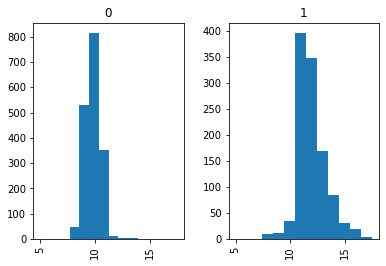

In [59]:
#descriptives of missing
df_all['obs'] = 1
df_all['nomiss_3'] = np.where(df_all[['retail','food_drugs','work']].isnull().any(axis=1),0,1)
df_all['consecutive_days_nomiss_3'] = df_all.groupby(['FIPS','nomiss_3'])['obs'].transform(sum)
df_all['max_days'] = np.where(df_all['consecutive_days_nomiss_3'] == df_all['consecutive_days_nomiss_3'].max(),1,0)
df_all['ln_pop'] = np.log(df_all['POP_ESTIMATE_2018'])
df_all.drop_duplicates(['FIPS','max_days']).hist(column='ln_pop',by='max_days',sharex=True)

In [60]:
df_all['date'] = pd.to_datetime(df_all['date'],errors='coerce')
state_dumms = pd.get_dummies(df_all.state_abb_x)
states = state_dumms.columns.values
day_dumms = pd.get_dummies(df_all['date'].dt.date)
print(len(day_dumms.columns))
day_dumms.columns = ['day' + str(i) for i in list(range(0,len(day_dumms.columns)))]
days = day_dumms.columns.values

df_fin = pd.concat([df_all,state_dumms,day_dumms],axis=1)
df_fin.rename(columns={'Percent of adults with less than a high school diploma, 2014-18':'pct_less_hs',
       'Percent of adults with a high school diploma only, 2014-18':'pct_only_hs',
       "Percent of adults completing some college or associate's degree, 2014-18":'pct_some_co',
       "Percent of adults with a bachelor's degree or higher, 2014-18":'pct_has_co'}, inplace=True)
df_fin = df_fin.merge(usda,on=['FIPS'],how='left')
extra_controls = ['ln_total_stores','perc_pop_low_access15','pct_less_hs','pct_only_hs','pct_some_co','PCTPOVALL_2018']
df_fin['ln_pop'] = df_fin['POP_ESTIMATE_2018'].apply(np.log)
df_fin['ln_income'] = df_fin['Median_Household_Income_2018'].apply(np.log)
df_fin['ln_employed'] = df_fin['Employed_2018'].apply(np.log)
df_fin['ln_unemployed'] = df_fin['Unemployed_2018'].apply(np.log)
df_fin['ln_total_stores'] = df_fin['total_stores'].apply(np.log)
df_fin['obs'] = 1
df_fin = df_fin.dropna(subset= ['party'])
print(df_fin.shape)
df_fin['nomiss_3'] = np.where(df_fin[['retail','food_drugs','work']].isnull().any(axis=1),0,1)
df_fin['consecutive_days_nomiss_3'] = df_fin.groupby(['FIPS','nomiss_3'])['obs'].transform(sum)
df_fin.sort_values(by=['FIPS','date'],inplace=True)

83
(219059, 381)


In [62]:
df_fin[['post_state_sah', 'eased_state_sah', 'post_state_mandate',
   'eased_state_mandate', 'post_state_non_ess', 'eased_state_non_ess',
   'post_state_lgb', 'eased_state_lgb', 'post_state_sc',
   'eased_state_sc', 'post_state_bar_res', 'eased_state_bar_res',
   'post_state_election', 'eased_state_election',
   'post_state_emergency', 'eased_state_emergency',
   'post_state_compliance', 'eased_state_compliance',
   'post_state_prepare', 'eased_state_prepare']].describe()

,post_state_sah,eased_state_sah,post_state_mandate,eased_state_mandate,post_state_non_ess,eased_state_non_ess,post_state_lgb,eased_state_lgb,post_state_sc,eased_state_sc,post_state_bar_res,eased_state_bar_res,post_state_election,eased_state_election,post_state_emergency,eased_state_emergency,post_state_compliance,eased_state_compliance,post_state_prepare,eased_state_prepare
count,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.000000,219059.0,219059.000000,219059.0,219059.000000
mean,0.123693,0.741147,0.013636,0.762146,0.151498,0.706668,0.143354,0.755404,0.155597,0.763872,0.163919,0.742978,0.049325,0.763872,0.168535,0.763872,0.0,0.763872,0.0,0.763872
std,0.329231,0.438006,0.115973,0.425770,0.358534,0.455290,0.350434,0.429849,0.362474,0.424703,0.370203,0.436993,0.216545,0.424703,0.374341,0.424703,0.0,0.424703,0.0,0.424703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


In [61]:
df_fin.columns.values

array(['country_region_code', 'country_region', 'state_x', 'county_x',
       'date', 'retail', 'food_drugs', 'park', 'transit', 'work', 'homes',
       'source', 'state_abb_x', 'FIPS', 'geo', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'Births_2018', 'Deaths_2018', 'NATURAL_INC_2018',
       'INTERNATIONAL_MIG_2018', 'DOMESTIC_MIG_2018', 'NET_MIG_2018',
       'RESIDUAL_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018',
       'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018',
       'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'POVALL_2018',
       'CI90LBAll_2018', 'CI90UBALL_2018', 'PCTPOVALL_2018',
       'CI90LBALLP_2018', 'CI90UBALLP_2018', 'POV017_2018',
       'CI90LB017_2018', 'CI90UB017_2018', 'PCTPOV017_2018',
       'CI90LB017P_2018', 'CI90UB017P_2018', 'POV517_2018',
       'CI90LB517_2018', 'CI90UB517_2018', 'PCTPOV517_2018',
       'CI90LB517P_2018', 'CI90UB517P_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'POV04_2018', 'CI90LB04_2018',
     

In [65]:
chk = df_fin[['consecutive_days_nomiss_3','state_abb_x','FIPS']].drop_duplicates()
chk[chk['consecutive_days_nomiss_3']==83]['state_abb_x'].value_counts()

TX    85
NC    60
OH    52
GA    48
FL    46
VA    45
CA    41
PA    40
NY    40
WI    34
MI    34
TN    33
IN    31
IL    29
AL    28
SC    25
WA    25
LA    23
MO    23
OR    23
MN    21
NJ    20
KY    19
OK    18
MD    17
AR    17
CO    16
MS    15
MA    12
NM    12
IA    12
AZ    11
NE    11
WV    10
KS     9
ME     8
CT     8
NH     7
ID     7
MT     6
UT     6
ND     5
NV     5
HI     4
DE     3
VT     3
RI     3
WY     2
SD     2
AK     1
Name: state_abb_x, dtype: int64

In [ ]:
# set one
one = {'name':'one',
    'lhs':['retail','food_drugs','transit','work','homes'],
'rhs':['republican'],
'controls':['vote_share_rep','ln_pop','ln_income','ln_employed','ln_unemployed','post_soe','post_sah'] + list(days)[1:] + list(states)[1:],
'sample':['obs','no_miss_days_3']}

In [ ]:
runs_1 = [one,two]
runs_2 = [three,four]

In [ ]:
# First Set
res = []
models = []
for r in runs_1:
    for x in r['rhs']:
        for y in r['lhs']:
            for s in r['sample']:
                vrs = [x] + r['controls'] + [y]
                vrs = [re.split(r'\*| \+ ',i.replace('C(','').replace(')','')) for i in vrs]
                vrs = list(itertools.chain.from_iterable(vrs))
                sam = df_fin[df_fin[s]==1][vrs].copy()
                X = [x] + r['controls'] 
                strng = '{} ~ '.format(y) + ' + '.join([str(i) for i in X])
                mod = smf.ols(strng,data=sam)
                print(r['name'],s,y,x)
                fitted = mod.fit(cov_type='HC1', return_type='dataframe')
                res.extend([fitted])
                title = 'Sample={}\nLHS={}\nRHS={}'.format(s,y,x)
                models.extend([title])
                sam = None
results = summary_col(res,stars=True,float_format='%0.2f',
                  model_names=models,
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared),
                            'R2adj':lambda x: "{:.2f}".format(x.rsquared_adj),
                            'F-pval':lambda x: "{:.2f}".format(int(x.f_pvalue))})
pd.DataFrame(results.tables[0]).to_csv('models/sample_size_run.csv')